In [7]:
import requests
import re
from urllib import parse
import pandas as pd
import time 
import random
headers = {
    "referer": "http://localhost:8888/",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36",
    'cookie': 't=62623297496a377eb6b3041cb8ca7523; cna=GfUoGtsp4h0CAduIgqhked5H; sgcookie=E100nntpvh6UKiH%2FvXXnOUjVX6D7iiV%2FeKGA42qzc4J1ZTxBV1m3XWgN0SNXW%2BpIVmHz991%2B%2BdmK3cBJfEvo5RX4Uzo8HA6moaSYIOtFKKx4yj8%3D; uc3=lg2=UtASsssmOIJ0bQ%3D%3D&vt3=F8dCvUmk7cTqxEGLKTc%3D&nk2=sa2PB3%2B%2Fte09FUlm&id2=UUwY8XSic%2Bnfgg%3D%3D; lgc=%5Cu53F6%5Cu95EE%5Cu8C01%5Cu662F%5Cu8FB0%5Cu5357; uc4=id4=0%40U27HpIzAfRVlb%2FejQgMBj4s4Nzif&nk4=0%40s8gwixFOpZXFkpsoPRHNQkgdS1wPZLQ%3D; tracknick=%5Cu53F6%5Cu95EE%5Cu8C01%5Cu662F%5Cu8FB0%5Cu5357; _cc_=UIHiLt3xSw%3D%3D; enc=JQKWwEikCR2K5q9aqvXxtx%2FNEciwWrHCqyWF0sXnZMQzx483cc%2FjF7zLBwnBV9ukkITMkYwNA2JuEwthd9oRrQ%3D%3D; mt=ci=-1_1; thw=cn; hng=CN%7Czh-CN%7CCNY%7C156; _m_h5_tk=8fd8408f8557f92280b4f6f194544fb9_1639662344680; _m_h5_tk_enc=fde32058ec6dbd95949bad8c336a0144; xlly_s=1; alitrackid=localhost; lastalitrackid=localhost; tfstk=cuHRBAxBwEYkPvqxbbdmdPPrjw0RaoB8JgaNpn90JqlfMiBhLsAsIAQtxQZT7zKA.; l=eBrtUZinO8d4ax2tBO5wourza77OaQAffsPzaNbMiIncC6pf_m9OWRtQcdSJap-RR8XcMtTB41UeeEvT4FUQ8yDjJ0YEae1VivEyCef..; isg=BGxsvFpZIYTrhgvkOflfhifYPUqeJRDP5z_nc8avJZYA0Qvb7jd5Xvkj9Znp2Ugn; JSESSIONID=5BCB4D04AFE0F758B6F0A971C70FF417',
}

keyword = '棉衣'
def get_parse(url):
    html = requests.get(url,headers= headers)
    if html.status_code ==200:
        print('页面正常')
        get_html(html)
    else:
        print(html.status_code)

def get_html(html):
    #用正则表达式去获取商品的名称，价格，商家名称和商家位置
    content = html.text
    #定位商品名称
    names = re.compile('"raw_title":"(.*?)"', re.I | re.S)
    name = names.findall(content)
    #定位价格
    prices = re.compile('"view_price":"(.*?)"',re.I|re.S)
    price = prices.findall(content)
    #定位商家名称
    nicks = re.compile('"nick":"(.*?)"',re.I|re.S)
    nick = nicks.findall(content)
    #定位商家位置
    item_locs = re.compile('"item_loc":"(.*?)"', re.I | re.S)
    item_loc= item_locs.findall(content)

    #付款人数
    view_sales = re.compile('"view_sales":"(.*?)"', re.I | re.S)
    view_sale = view_sales.findall(content)
    df = pd.DataFrame()
    #先算出爬出来正则的长度，从而确定循环，把商品的名称，价格，位置全部有序的全部打印出来
    for j in range(len(name)):
        df['店铺名称'] = [nick[j]]
        df['商品名'] = [name[j]]
        df['价格'] = [price[j]]
        df['产地'] = [item_loc[j]]
        df['付款人数'] = [view_sale[j]]
        df.to_csv('棉衣.csv',mode='a+',header=None,index=None)
    time.sleep(5)
        # print('商品名称：{}\n价格：{}\n商家名称：{}\n商家位置：{}\n'.format(name[j], price[j], nick[j], item_loc[j]))

if __name__ == '__main__':
    df = pd.DataFrame()
    df['店铺名称'] = ['店铺名称']
    df['商品名'] = ['商品名']
    df['价格'] = ['价格']
    df['产地'] = ['产地']
    df['付款人数'] = ['付款人数']
    df.to_csv('棉衣.csv', mode='a+', header=None, index=None)
    count = 1
    for i in range(0,441,44):
        print('正在爬取第{}页'.format(count))
        url = "https://s.taobao.com/search?q={}&imgfile=&commend=all&ssid=s5-e&search_type=item&sourceId=tb.index&spm=a21bo.2017.201856-taobao-item.1&ie=utf8&initiative_id=tbindexz_20170306&bcoffset=-29&ntoffset=-29&p4ppushleft=2%2C48&s={}".format(parse.quote(keyword),i)
        get_parse(url)
        count += 1





正在爬取第1页
页面正常
正在爬取第2页
页面正常
正在爬取第3页
页面正常
正在爬取第4页
页面正常
正在爬取第5页
页面正常
正在爬取第6页
页面正常
正在爬取第7页
页面正常
正在爬取第8页
页面正常
正在爬取第9页
页面正常
正在爬取第10页
页面正常
正在爬取第11页
页面正常


In [8]:
#展示数据内容
import pandas as pd
import random
df = pd.read_csv('棉衣.csv')
df.head()

,店铺名称,商品名,价格,产地,付款人数
0,闪电鞋行,新款外套棉衣休闲棉袄纯色男加厚立领黑色潮,286.0,北京,1人付款
1,benpanda熊猫本旗舰店,熊猫本 棉服男潮牌日系宽松工装冬季棒球外套休闲百搭飞行员棉衣,289.0,福建 福州,1000+人付款
2,suamoment旗舰店,Suamoment抓痕立体血爪PU棉服潮牌保暖情侣棉衣外套刘耀文同款,528.0,江苏 南京,3000+人付款
3,dangerouspeople旗舰,Dangerouspeople薛之谦dsp水波纹棉服男冬季新款潮流加厚棉衣外套,479.0,上海,3000+人付款
4,benpanda熊猫本旗舰店,熊猫本 2021冬季新款棉服潮牌宽松日系加厚棉袄外套男防泼水棉衣,268.0,福建 福州,900+人付款


In [9]:
#删除重复数据
df = df.drop_duplicates()

In [10]:
#清洗数据把付款人数除了数字以为的内容全部替换成数字
def qxsj(x):
    x = x.replace("人付款","")
    if '万+' in x:
        return int(int(x[:-2])*random.uniform(1,2)*10000)
    elif '+' in x:
        return int(int(x[:-1])+random.random()*1000)
    else:
        return int(x)
df['付款人数'] = df['付款人数'].apply(qxsj)
df['付款人数']

0         1
1      1581
2      3539
3      3922
4      1544
       ... 
483    1624
484    1838
485    1189
486    1481
487    1638
Name: 付款人数, Length: 436, dtype: int64

In [11]:
#查看数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 487
Data columns (total 5 columns):
店铺名称    436 non-null object
商品名     436 non-null object
价格      436 non-null float64
产地      436 non-null object
付款人数    436 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 20.4+ KB


In [12]:
#用于清洗标题里面的一些重复字段，使得数据准确
#定义机械压缩函数
def yasuo(st):
    for i in range(1,int(len(st)/2)+1):
        for j in range(len(st)):
            if st[j:j+i] == st[j+i:j+2*i]:
                k = j + i
                while st[k:k+i] == st[k+i:k+2*i] and k<len(st):   
                    k = k + i
                st = st[:j] + st[k:]    
    return st

In [13]:
#调用上面的函数
df["商品名"] = df["商品名"].apply(yasuo)

In [14]:
#再把标题里面一些表情包上面的给删除，使得整体数据干净整洁
df['商品名'] = df['商品名'].str.extract(r"([\u4e00-\u9fa5]+)")
df = df.dropna()  #纯表情弹幕直接删除

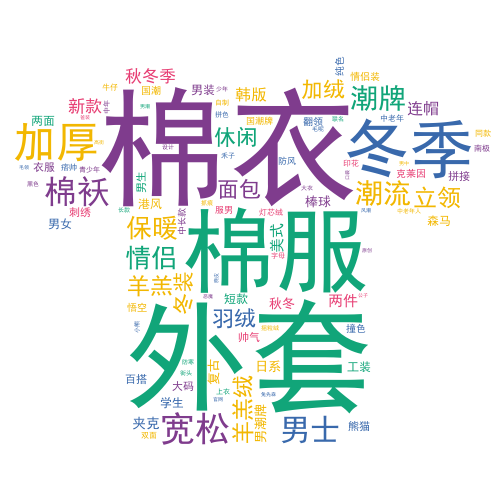

In [16]:
#数据处理库
import numpy as np
import pandas as pd
import glob
import re
import jieba 

#可视化库
import stylecloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from pyecharts.charts import *
from pyecharts import options as opts 
from pyecharts.globals import ThemeType  
from IPython.display import Image 

# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open("stopwords_cn.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())            

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected

# 绘制词云图
text1 = get_cut_words(content_series=df["商品名"])
stylecloud.gen_stylecloud(text=' '.join(text1), max_words=100,
                          collocations=False,
                          font_path='simhei.ttf',
                          icon_name='fas fa-tshirt',
                          size=500,
                          #palette='matplotlib.Inferno_9',
                          output_name='棉衣特点.png')
Image(filename='棉衣特点.png') 

In [17]:
df['产地'] = df['产地'].str.split(" ",expand = True)[0]
df['产地']

0      北京
1      福建
2      江苏
3      上海
4      福建
       ..
483    浙江
484    广东
485    浙江
486    浙江
487    浙江
Name: 产地, Length: 436, dtype: object

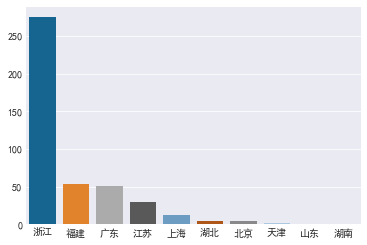

In [25]:
#各省产量分布图
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rcParams['font.sans-serif'] = ['SimHei']
data = df['产地'].value_counts()
x_data = [i for i in data.index][0:10]
y_data = [int(i) for i in data.values][0:10]
sns.barplot(x_data,y_data)
plt.show()

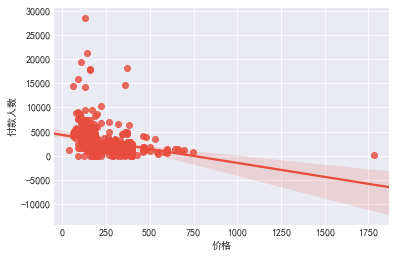

In [28]:
#销量和价格之间的关系
plt.rcParams['axes.unicode_minus']=False
sns.regplot(x='价格',y='付款人数', data=df,color='#E74C3C')
plt.show()

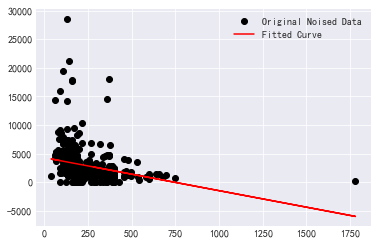

In [35]:
from scipy.optimize import curve_fit
def func(x,a,b):
    return a + b*x

popt,pcov = curve_fit(func,df['价格'].values,df['付款人数'].values)
plt.plot(df['价格'].values,df['付款人数'].values,'ko',label='Original Noised Data')
plt.plot(df['价格'].values,func(df['价格'].values,*popt),'r',label='Fitted Curve')
plt.legend()
plt.show()

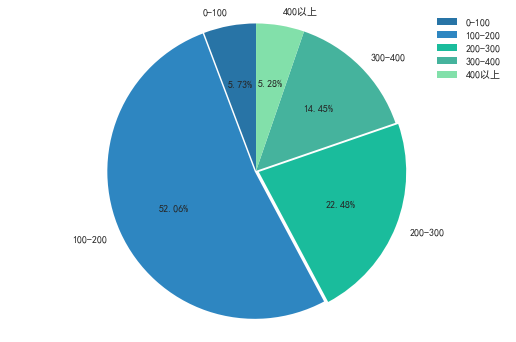

In [30]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
for i in df['价格']:
    if i <= 100:
        count1 +=1
    elif 100 < i <= 200:
        count2 += 1
    elif 200 < i <= 300:
        count3 += 1
    elif 300 < i <= 400:
        count4 += 1
    else:
        count5 += 1
x_data = ['0-100','100-200','200-300','300-400','400以上']
y_data = [count1,count2,count3,count4,count5]

plt.figure(figsize=(9,6)) #调节图形大小
labels = x_data #定义标签
sizes = y_data #每块值
colors = ['#2874A6','#2E86C1','#1ABC9C','#45B39D','#82E0AA'] #每块颜色定义
explode = (0,0.01,0.02,0,0) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.1,#图例距圆心半径倍距离
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.axis('equal')
plt.legend()
plt.show()

In [36]:
data_pair = [(i, int(j)) for i, j in zip(df['店铺名称'].values, df['付款人数'].values)]

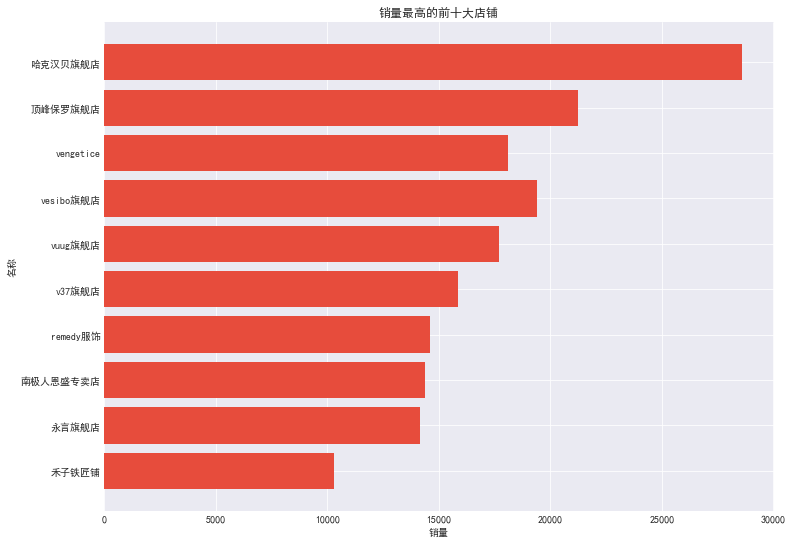

In [44]:
data_pair.sort(key=lambda x:x[1],reverse=True)

x_data = [x[0] for x in data_pair][0:11]
y_data = [x[1] for x in data_pair][0:11]
x_data.reverse()
y_data.reverse()
plt.figure(figsize=(12,9))
plt.barh(x_data,y_data,color = '#E74C3C')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title("销量最高的前十大店铺")
plt.xlabel("销量")
plt.ylabel("名称")
plt.show()